<IPython.core.display.Javascript object>


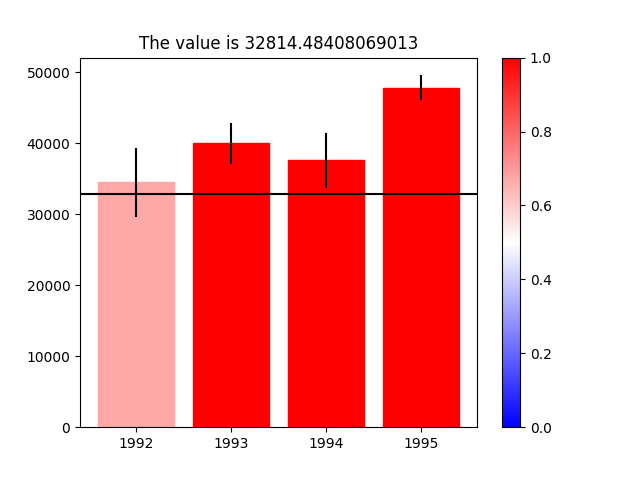

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as LSC
%matplotlib notebook

#creating random df
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])

#initializing vars
n = df.shape[1]
r = df.shape[0]
yrAVG = df.mean(axis = 1)
yrSTD = df.std(axis = 1)
# standard deviation. for the sample mean
yerr = yrSTD / np.sqrt(n)* stats.t.ppf(1-0.05/2, n-1)

#setting up plot and threshold
fig, ax = plt.subplots()
#plt.show()
y = 42000
line = plt.axhline(y = y, color = 'black')


#color scale
cmap = LSC.from_list('MyCmapName',['b','white','red'])
scale = cm.ScalarMappable(cmap=cmap)
scale.set_array([])
plt.colorbar(scale)

#picking colors based on threshold
def devs(y):
    devs = []
    for bar, yerr_ in zip(barslist, yerr):
        L = bar.get_height() - yerr_
        H = bar.get_height() + yerr_
        dev = (H-y)/(H-L)
        if dev>1: dev = 1
        if dev<0: dev=0
        devs.append(dev)
    colors = scale.to_rgba(devs)
    return devs

#bar plot
barslist = plt.bar(range(r), yrAVG, yerr = yerr)

#updating line based on y
def update(y):
    line.set_ydata(y)
    d = devs(y)
    for bar,i in zip(barslist,d):
        bar.set_color(scale.to_rgba(i))

#call for update
update(y)

#updating treshold based on event.ydata
def onclick(event):
    if event.inaxes == ax:
        update(event.ydata)
        Y = event.ydata
        fig.canvas.draw_idle()
        plt.title('The value is {}'.format(Y))
    return event
#connect to canvas, adding xticks
fig.canvas.mpl_connect('button_press_event',onclick)
plt.xticks(range(r), df.index)
fig.savefig('A4 Error Visual.png')
fig.show()
